In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [2]:
# Connect to SQLite database
conn = sqlite3.connect('d211.db')
cursor = conn.cursor()
# Path to your CSV files (adjust the paths to match your desktop locations)
churn_clean_csv = 'C:/Users/Joshua/Desktop/school/d211/churn_clean.csv'
kaggle_data_csv = 'C:/Users/Joshua/Desktop/school/d211/kaggle_data.csv'

In [3]:
# Function to check if a table exists in SQLite
def table_exists(table_name):
    cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}';")
    return bool(cursor.fetchone())

# Define the SQL commands for table creation
churn_clean_table = """
CREATE TABLE IF NOT EXISTS churn_clean (
    Customer_id TEXT,
    Children INTEGER,
    Age INTEGER,
    Income DECIMAL(10, 2),
    Marital TEXT,
    Gender TEXT,
    Techie TEXT,
    Contract TEXT,
    InternetService TEXT,
    Phone TEXT,
    Multiple TEXT,
    OnlineSecurity TEXT,
    OnlineBackup TEXT,
    DeviceProtection TEXT,
    TechSupport TEXT,
    StreamingTV TEXT,
    StreamingMovies TEXT,
    PaperlessBilling TEXT,
    PaymentMethod TEXT,
    Tenure INTEGER,
    MonthlyCharge DECIMAL(10, 2),
    Churn TEXT
);
"""

kaggle_data_table = """
CREATE TABLE IF NOT EXISTS kaggle_data (
    Customer_id TEXT,
    Gender TEXT,
    SeniorCitizen INTEGER,
    Partner TEXT,
    Dependents TEXT,
    Tenure INTEGER,
    Phone TEXT,
    Multiple TEXT,
    InternetService TEXT,
    OnlineSecurity TEXT,
    OnlineBackup TEXT,
    DeviceProtection TEXT,
    TechSupport TEXT,
    StreamingTV TEXT,
    StreamingMovies TEXT,
    Contract TEXT,
    PaperlessBilling TEXT,
    PaymentMethod TEXT,
    MonthlyCharges DECIMAL(10, 2),
    TotalCharges DECIMAL(10, 2),
    Churn TEXT
);
"""

# Check if tables exist and create if not
if not table_exists("churn_clean"):
    cursor.execute(churn_clean_table)
    print("churn_clean table created")
else:
    print("churn_clean table already exists")

if not table_exists("kaggle_data"):
    cursor.execute(kaggle_data_table)
    print("kaggle_data table created")
else:
    print("kaggle_data table already exists")

# Read CSV files into DataFrames
churn_clean_df = pd.read_csv(churn_clean_csv)
kaggle_data_df = pd.read_csv(kaggle_data_csv)

# Insert the DataFrames into SQLite tables
churn_clean_df.to_sql('churn_clean', conn, if_exists='replace', index=False)
kaggle_data_df.to_sql('kaggle_data', conn, if_exists='replace', index=False)

print("Data from CSVs has been inserted into the tables.")

# Load the churn_clean table into a DataFrame from SQLite
churn_clean_df_from_db = pd.read_sql("SELECT * FROM churn_clean", conn)

# Load the kaggle_data table into a DataFrame from SQLite
kaggle_data_df_from_db = pd.read_sql("SELECT * FROM kaggle_data", conn)

# Drop unwanted columns from both DataFrames
columns_to_keep_churn = [
    'Customer_id', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Techie', 
    'Contract', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
    'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Churn'
]

columns_to_keep_kaggle = [
    'Customer_id', 'Gender', 'SeniorCitizen', 'Partner', 'Children', 'Tenure', 'Phone', 
    'Multiple', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
    'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'Churn'
]

# Keep only the required columns
churn_clean_df_filtered = churn_clean_df_from_db[columns_to_keep_churn]
kaggle_data_df_filtered = kaggle_data_df_from_db[columns_to_keep_kaggle]

# Display the filtered data to ensure extra columns are dropped
print("Filtered churn_clean Data:")
display(churn_clean_df_filtered.head())

print("\nFiltered kaggle_data Data:")
display(kaggle_data_df_filtered.head())

churn_clean table already exists
kaggle_data table already exists
Data from CSVs has been inserted into the tables.
Filtered churn_clean Data:


,Customer_id,Children,Age,Income,Marital,Gender,Techie,Contract,InternetService,Phone,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Churn
0,K409198,0,68,28561.99,Widowed,Male,No,One year,Fiber Optic,Yes,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,No
1,S120509,1,27,21704.77,Married,Female,Yes,Month-to-month,Fiber Optic,Yes,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,Yes
2,K191035,4,50,9609.57,Widowed,Female,Yes,Two Year,DSL,Yes,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,No
3,D90850,1,48,18925.23,Married,Male,Yes,Two Year,DSL,Yes,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,No
4,K662701,0,83,40074.19,Separated,Male,No,Month-to-month,Fiber Optic,No,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,Yes



Filtered kaggle_data Data:


,Customer_id,Gender,SeniorCitizen,Partner,Children,Tenure,Phone,Multiple,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Convert Children column to binary: if value > 0, set to 1; otherwise set to 0
churn_clean_df_filtered['Children'] = churn_clean_df_filtered['Children'].apply(lambda x: 1 if x > 0 else 0)

# Convert Yes/No fields to binary for churn_clean
yes_no_columns_churn_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                              'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                              'Churn']

for col in yes_no_columns_churn_clean:
    churn_clean_df_filtered[col] = churn_clean_df_filtered[col].replace({'Yes': 1, 'No': 0})

# Convert Yes/No fields to binary for kaggle_data
yes_no_columns_kaggle_data = ['Partner', 'Children', 'OnlineSecurity', 'OnlineBackup', 
                              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                              'PaperlessBilling', 'Churn']

for col in yes_no_columns_kaggle_data:
    kaggle_data_df_filtered[col] = kaggle_data_df_filtered[col].replace({'Yes': 1, 'No': 0})

# Display the transformed data
print("Transformed churn_clean Data:")
display(churn_clean_df_filtered.head())

print("\nTransformed kaggle_data Data:")
display(kaggle_data_df.head())

Transformed churn_clean Data:


C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\3430347502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_clean_df_filtered['Children'] = churn_clean_df_filtered['Children'].apply(lambda x: 1 if x > 0 else 0)
C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\3430347502.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_clean_df_filtered[col] = churn_clean_df_filtered[col].replace({'Yes': 1, 'No': 0})
C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\3430347502.py:10: SettingWithCopyWarning: 
A v

,Customer_id,Children,Age,Income,Marital,Gender,Techie,Contract,InternetService,Phone,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Churn
0,K409198,0,68,28561.99,Widowed,Male,No,One year,Fiber Optic,Yes,...,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,0
1,S120509,1,27,21704.77,Married,Female,Yes,Month-to-month,Fiber Optic,Yes,...,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,1
2,K191035,1,50,9609.57,Widowed,Female,Yes,Two Year,DSL,Yes,...,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,0
3,D90850,1,48,18925.23,Married,Male,Yes,Two Year,DSL,Yes,...,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,0
4,K662701,0,83,40074.19,Separated,Male,No,Month-to-month,Fiber Optic,No,...,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,1



Transformed kaggle_data Data:


,Customer_id,Gender,SeniorCitizen,Partner,Children,Tenure,Phone,Multiple,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Convert 'Marital' column in churn_clean to binary (1 if Married, 0 otherwise)
churn_clean_df_filtered['Marital'] = churn_clean_df_filtered['Marital'].apply(lambda x: 1 if x == 'Married' else 0)

# Rename the 'Marital' column to 'Partner' to match kaggle_data's column name
churn_clean_df_filtered.rename(columns={'Marital': 'Partner'}, inplace=True)

# Show the updated churn_clean DataFrame
print("Updated churn_clean Data with binary 'Partner':")
display(churn_clean_df_filtered.head())

Updated churn_clean Data with binary 'Partner':


C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\506949827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_clean_df_filtered['Marital'] = churn_clean_df_filtered['Marital'].apply(lambda x: 1 if x == 'Married' else 0)
C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\506949827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_clean_df_filtered.rename(columns={'Marital': 'Partner'}, inplace=True)


,Customer_id,Children,Age,Income,Partner,Gender,Techie,Contract,InternetService,Phone,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Churn
0,K409198,0,68,28561.99,0,Male,No,One year,Fiber Optic,Yes,...,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,0
1,S120509,1,27,21704.77,1,Female,Yes,Month-to-month,Fiber Optic,Yes,...,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,1
2,K191035,1,50,9609.57,0,Female,Yes,Two Year,DSL,Yes,...,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,0
3,D90850,1,48,18925.23,1,Male,Yes,Two Year,DSL,Yes,...,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,0
4,K662701,0,83,40074.19,0,Male,No,Month-to-month,Fiber Optic,No,...,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,1


In [6]:
# Convert Age in churn_clean to binary for SeniorCitizen (1 if age >= 65, else 0)
churn_clean_df_filtered['SeniorCitizen'] = churn_clean_df_filtered['Age'].apply(lambda x: 1 if x >= 65 else 0)

# Drop the Age, Income, and Techie columns from churn_clean
churn_clean_df_filtered.drop(columns=['Age', 'Income', 'Techie'], inplace=True)

# Perform the merge again with the updated churn_clean table
combined_df = pd.merge(churn_clean_df_filtered, kaggle_data_df_filtered, on='Customer_id', how='outer')

# Handle conflicting columns as we did before (adjusting for SeniorCitizen)
conflicting_columns = [col for col in combined_df.columns if '_x' in col or '_y' in col]

for col in conflicting_columns:
    base_col = col.split('_')[0]
    
    # Check if both '_x' and '_y' versions exist before combining
    if f"{base_col}_x" in combined_df.columns and f"{base_col}_y" in combined_df.columns:
        # Use combine_first to prioritize values from _x and fill missing with _y
        combined_df[base_col] = combined_df[f"{base_col}_x"].combine_first(combined_df[f"{base_col}_y"])
        # Drop the _x and _y columns after merging
        combined_df.drop([f"{base_col}_x", f"{base_col}_y"], axis=1, inplace=True)
    elif f"{base_col}_x" in combined_df.columns:
        # If only _x version exists, rename it to the base column name
        combined_df.rename(columns={f"{base_col}_x": base_col}, inplace=True)
    elif f"{base_col}_y" in combined_df.columns:
        # If only _y version exists, rename it to the base column name
        combined_df.rename(columns={f"{base_col}_y": base_col}, inplace=True)

# List of columns we want to keep in the combined DataFrame
columns_to_keep_combined = [
    'Customer_id', 'Children', 'Partner', 'Gender', 'Churn', 'Contract', 'InternetService', 
    'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 
    'MonthlyCharge', 'TotalCharges', 'SeniorCitizen'
]

# Drop all columns that are not in the 'columns_to_keep_combined' list
combined_df_filtered = combined_df[columns_to_keep_combined]

# Display the resulting DataFrame after dropping extra columns
print("Filtered Combined Data:")
display(combined_df_filtered.info())
display(combined_df_filtered.head())

C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\319477806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_clean_df_filtered['SeniorCitizen'] = churn_clean_df_filtered['Age'].apply(lambda x: 1 if x >= 65 else 0)
C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\319477806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_clean_df_filtered.drop(columns=['Age', 'Income', 'Techie'], inplace=True)


Filtered Combined Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17043 entries, 0 to 17042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_id       17043 non-null  object 
 1   Children          17043 non-null  float64
 2   Partner           17043 non-null  float64
 3   Gender            17043 non-null  object 
 4   Churn             17043 non-null  float64
 5   Contract          17043 non-null  object 
 6   InternetService   14914 non-null  object 
 7   Phone             17043 non-null  object 
 8   Multiple          17043 non-null  object 
 9   OnlineSecurity    17043 non-null  object 
 10  OnlineBackup      17043 non-null  object 
 11  DeviceProtection  17043 non-null  object 
 12  TechSupport       17043 non-null  object 
 13  StreamingTV       17043 non-null  object 
 14  StreamingMovies   17043 non-null  object 
 15  PaperlessBilling  17043 non-null  float64
 16  PaymentMethod   

None

,Customer_id,Children,Partner,Gender,Churn,Contract,InternetService,Phone,Multiple,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,TotalCharges,SeniorCitizen
0,0002-ORFBO,1.0,1.0,Female,0.0,One year,DSL,Yes,No,0,...,0,1,1,0,1.0,Mailed check,9.0,65.6,593.3,0.0
1,0003-MKNFE,0.0,0.0,Male,0.0,Month-to-month,DSL,Yes,Yes,0,...,0,0,0,1,0.0,Mailed check,9.0,59.9,542.4,0.0
2,0004-TLHLJ,0.0,0.0,Male,1.0,Month-to-month,Fiber optic,Yes,No,0,...,1,0,0,0,1.0,Electronic check,4.0,73.9,280.85,0.0
3,0011-IGKFF,0.0,1.0,Male,1.0,Month-to-month,Fiber optic,Yes,No,0,...,1,0,1,1,1.0,Electronic check,13.0,98.0,1237.85,1.0
4,0013-EXCHZ,0.0,1.0,Female,1.0,Month-to-month,Fiber optic,Yes,No,0,...,0,1,1,0,1.0,Mailed check,3.0,83.9,267.4,1.0


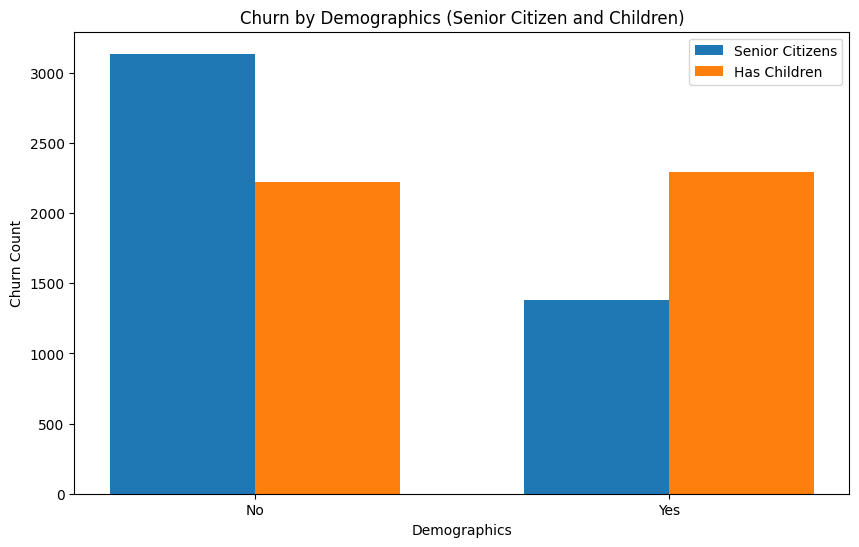

In [7]:
# Churn by Demographics (Stacked Bar Chart)
senior_citizen_churn = combined_df.groupby('SeniorCitizen')['Churn'].sum()
children_churn = combined_df.groupby('Children')['Churn'].sum()

bar_width = 0.35
index = np.arange(2)

plt.figure(figsize=(10,6))
plt.bar(index, senior_citizen_churn, bar_width, label='Senior Citizens')
plt.bar(index + bar_width, children_churn, bar_width, label='Has Children')
plt.xlabel('Demographics')
plt.ylabel('Churn Count')
plt.title('Churn by Demographics (Senior Citizen and Children)')
plt.xticks(index + bar_width / 2, ['No', 'Yes'])
plt.legend()
plt.show()

C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\3565988786.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_churn_avg = combined_df.groupby('MonthlyChargeBin')['Churn'].mean()


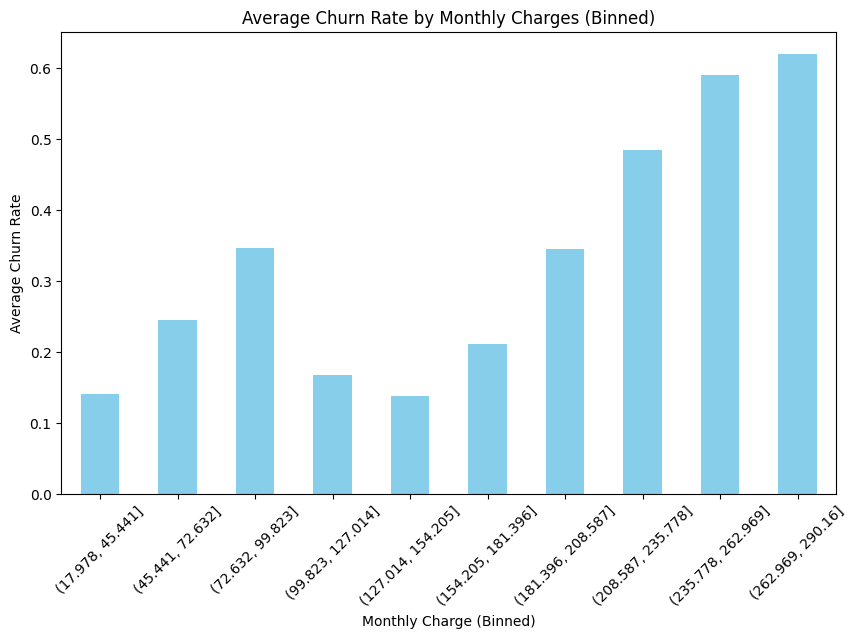

In [8]:
# Bin the monthly charges and calculate mean churn rate per bin
combined_df['MonthlyChargeBin'] = pd.cut(combined_df['MonthlyCharge'], bins=10)
monthly_churn_avg = combined_df.groupby('MonthlyChargeBin')['Churn'].mean()

# Updated Binned Churn by Monthly Charges (Bar Plot)
plt.figure(figsize=(10,6))
monthly_churn_avg.plot(kind='bar', color='skyblue')
plt.title('Average Churn Rate by Monthly Charges (Binned)')
plt.xlabel('Monthly Charge (Binned)')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Initialize Dash app
app = dash.Dash(__name__)

# Calculate KPIs
average_churn_rate = combined_df['Churn'].mean()
total_customers = len(combined_df)

# Ensure no NaN or invalid values in the Dropdown options
combined_df['Gender'] = combined_df['Gender'].fillna('Unknown').astype(str)
combined_df['InternetService'] = combined_df['InternetService'].fillna('Unknown').astype(str)

# Define app layout
app.layout = html.Div([
    # KPI Row
    html.Div([
        html.Div([
            html.H3('Average Churn Rate'),
            html.P(f"{average_churn_rate:.2%}")
        ], style={'width': '48%', 'display': 'inline-block'}),
        
        html.Div([
            html.H3('Total Customers'),
            html.P(f"{total_customers}")
        ], style={'width': '48%', 'display': 'inline-block', 'textAlign': 'right'})
    ], style={'display': 'flex', 'justifyContent': 'space-between', 'margin': '20px'}),
    
    # Filters Section (Moved to below KPIs)
    html.Div([
        html.Label('Tenure Range:'),
        dcc.RangeSlider(
            id='tenure-slider',
            min=combined_df['Tenure'].min(),
            max=combined_df['Tenure'].max(),
            value=[combined_df['Tenure'].min(), combined_df['Tenure'].max()],
            marks={i: f'{i}' for i in range(0, int(combined_df['Tenure'].max())+1, 10)},
        ),
        
        html.Label('Monthly Charge Range:'),
        dcc.RangeSlider(
            id='monthly-charge-slider',
            min=combined_df['MonthlyCharge'].min(),
            max=combined_df['MonthlyCharge'].max(),
            value=[combined_df['MonthlyCharge'].min(), combined_df['MonthlyCharge'].max()],
            marks={i: f'${i:.0f}' for i in range(0, int(combined_df['MonthlyCharge'].max())+1, 50)},
        ),

        html.Label('Filter by Gender:'),
        dcc.Dropdown(
            id='gender-dropdown',
            options=[{'label': gender, 'value': gender} for gender in combined_df['Gender'].unique()],
            value=None,
            placeholder="Select Gender"
        ),

        html.Label('Filter by Internet Service:'),
        dcc.Dropdown(
            id='internet-dropdown',
            options=[{'label': internet, 'value': internet} for internet in combined_df['InternetService'].unique()],
            value=None,
            placeholder="Select Internet Service"
        )
    ], style={'margin': '20px'}),
    
    # Graphs Section
    html.Div([
        # Churn by Tenure (Line graph)
        dcc.Graph(id='churn-tenure-graph', style={'width': '100%', 'margin': '20px'}),
        
        # Two bar graphs side by side
        html.Div([
            # Churn by Service Subscription (Grouped Bar Chart)
            dcc.Graph(id='churn-service-graph', style={'width': '48%', 'display': 'inline-block', 'margin': '20px'}),
            
            # Churn by Demographics (Grouped Bar Chart for Senior Citizen and Children)
            dcc.Graph(id='churn-demographics-graph', style={'width': '48%', 'display': 'inline-block', 'margin': '20px'})
        ], style={'display': 'flex', 'justify-content': 'space-between'}),
        
        # Churn by Monthly Charges (Binned Bar Chart)
        dcc.Graph(id='churn-monthly-charge-graph', style={'width': '100%', 'margin': '20px'})
    ]),
])

@app.callback(
    [Output('churn-tenure-graph', 'figure'),
     Output('churn-service-graph', 'figure'),
     Output('churn-demographics-graph', 'figure'),
     Output('churn-monthly-charge-graph', 'figure')],
    [Input('tenure-slider', 'value'),
     Input('monthly-charge-slider', 'value'),
     Input('gender-dropdown', 'value'),
     Input('internet-dropdown', 'value')]
)
def update_graphs(tenure_range, charge_range, gender, internet_service):
    # Filter the dataframe based on the inputs
    filtered_df = combined_df[
        (combined_df['Tenure'] >= tenure_range[0]) & 
        (combined_df['Tenure'] <= tenure_range[1]) &
        (combined_df['MonthlyCharge'] >= charge_range[0]) &
        (combined_df['MonthlyCharge'] <= charge_range[1])
    ]
    
    if gender:
        filtered_df = filtered_df[filtered_df['Gender'] == gender]

    if internet_service:
        filtered_df = filtered_df[filtered_df['InternetService'] == internet_service]
    
    # **Churn by Tenure (Binned by Year)**
    churn_by_tenure = filtered_df.groupby(filtered_df['Tenure'].apply(lambda x: int(x)))['Churn'].mean().reset_index()

    # Create the line graph using binned Tenure values (by year)
    churn_tenure_fig = px.line(churn_by_tenure, x='Tenure', y='Churn', 
                               title='Average Churn Rate by Tenure (Binned by Year)',
                               labels={'Churn': 'Average Churn Rate', 'Tenure': 'Tenure (Years)'})
    
    # Churn by Service Subscription (Grouped Bar Chart for StreamingTV and StreamingMovies)
    filtered_df['Streaming Service'] = filtered_df.apply(
        lambda row: 'TV and Movies' if row['StreamingTV'] == 1 and row['StreamingMovies'] == 1 else
                    'TV Only' if row['StreamingTV'] == 1 else
                    'Movies Only' if row['StreamingMovies'] == 1 else 'None', axis=1)

    churn_service_grouped = filtered_df.groupby(['Streaming Service', 'Churn']).size().reset_index(name='Count')
    
    # Explicitly setting blue for "No Churn" and red for "Churn"
    churn_service_fig = px.bar(churn_service_grouped, x='Streaming Service', y='Count', color='Churn',
                               title='Churn by Service Subscription (Streaming TV and Movies)',
                               barmode='group',
                               color_discrete_map={0: 'blue', 1: 'red'},  # No Churn = blue, Churn = red
                               labels={'Churn': 'Churn Status', 'Streaming Service': 'Streaming Service'})
    
    # Churn by Demographics (Grouped Bar Chart for Senior Citizen and Children)
    churn_by_demo = filtered_df.groupby(['SeniorCitizen', 'Children', 'Churn']).size().reset_index(name='Count')
    
    churn_demo_fig = px.bar(churn_by_demo, x='SeniorCitizen', y='Count', color='Churn', 
                            title='Churn by Demographics (Senior Citizen and Children)',
                            facet_col='Children', barmode='group',
                            color_discrete_map={0: 'blue', 1: 'red'},  # No Churn = blue, Churn = red
                            labels={'Churn': 'Churn Status', 'SeniorCitizen': 'Senior Citizen', 'Children': 'Children'})
        
    # Churn by Monthly Charges (Binned Bar Chart)
    filtered_df['MonthlyChargeBin'] = pd.cut(filtered_df['MonthlyCharge'], bins=10)
    churn_by_monthly_charge = filtered_df.groupby('MonthlyChargeBin')['Churn'].mean().reset_index()
    
    # Convert Interval objects to strings for JSON serialization
    churn_by_monthly_charge['MonthlyChargeBin'] = churn_by_monthly_charge['MonthlyChargeBin'].astype(str)
    
    churn_monthly_fig = px.bar(churn_by_monthly_charge, x='MonthlyChargeBin', y='Churn', color='Churn',
                               title='Churn Rate by Monthly Charges (Binned)',
                               labels={'Churn': 'Average Churn Rate'})
    
    churn_service_fig.update_layout(height=600, width=800)
    churn_demo_fig.update_layout(height=600, width=800)

    return churn_tenure_fig, churn_service_fig, churn_demo_fig, churn_monthly_fig



# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\Joshua\AppData\Local\Temp\ipykernel_18324\1728941427.py:142: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

